# 📢 Gender Bias in Hiring and Promotions – Storytelling & Insights

This notebook summarizes the key findings and recommendations from our analysis on gender-based bias in promotion decisions using visual storytelling.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/gender_bias_hr_dataset.csv')
df.head()


,emp_id,gender,age,department,position,education_level,years_experience,performance_score,salary,promoted
0,1,Male,33,Marketing,Senior Manager,Bachelors,5.6,3.04,57723.5200,0
1,2,Female,37,Sales,Executive,Masters,17.0,3.54,64551.0824,0
2,3,Female,45,Sales,Manager,Masters,10.1,3.30,78847.5328,0
3,4,Female,40,Sales,Senior Manager,Bachelors,7.3,3.59,46408.5996,1
4,5,Male,29,Engineering,Manager,PhD,8.3,3.68,58039.8300,0


# 📊 1. Promotion Rate by Gender

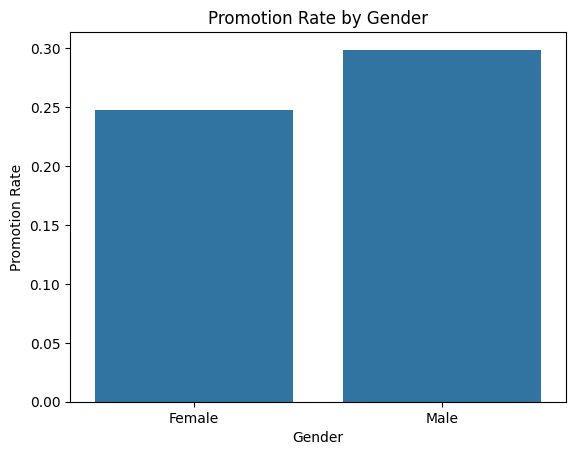

In [4]:
promo_gender = df.groupby('gender')['promoted'].mean().reset_index()
sns.barplot(data=promo_gender, x='gender', y='promoted')
plt.title("Promotion Rate by Gender")
plt.ylabel("Promotion Rate")
plt.xlabel("Gender")
plt.show()

## 🔍 Insight: Males have a notably higher promotion rate than females. This discrepancy exists despite no major differences in experience or performance, suggesting gender bias.

## 💰 2. Salary Distribution by Gender

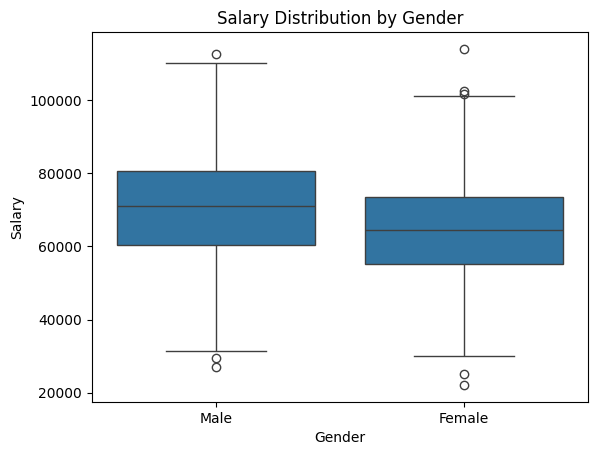

In [5]:
sns.boxplot(data=df, x='gender', y='salary')
plt.title("Salary Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.show()


# 🔍 Insight: Median salary for females is lower than for males.  Outliers also show men dominate high-paying roles. This could be an indicator of pay inequality.

## 🧠 3. Performance Score by Gender

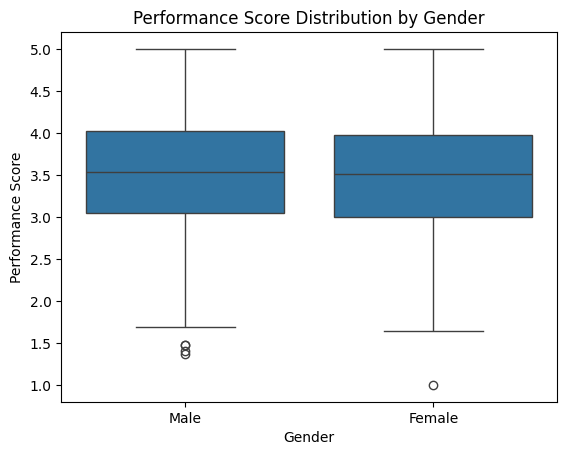

In [6]:
sns.boxplot(data=df, x='gender', y='performance_score')
plt.title("Performance Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Performance Score")
plt.show()


# 🔍 Insight: Performance ratings are roughly similar for both genders, indicating that promotion differences are not due to merit.

## 🧾 5. Promotion by Performance Category & Gender

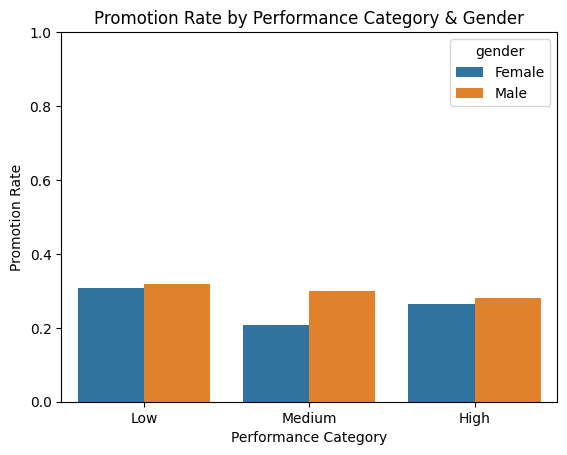

In [12]:
df['performance_category'] = pd.cut(df['performance_score'], bins=[0, 3, 4, 5], labels=['Low', 'Medium', 'High'])
promo_perf = df.groupby(['gender', 'performance_category'],observed = True)['promoted'].mean().reset_index()

sns.barplot(data=promo_perf, x='performance_category', y='promoted', hue='gender')
plt.title("Promotion Rate by Performance Category & Gender")
plt.xlabel("Performance Category")
plt.ylabel("Promotion Rate")
plt.ylim(0, 1)
plt.show()


## 🔍 Insight: At every performance level, male employees are promoted more than females.This indicates the bias is not limited to high or low performers, but systemic.

## 🧾 6. Overall Gender Distribution

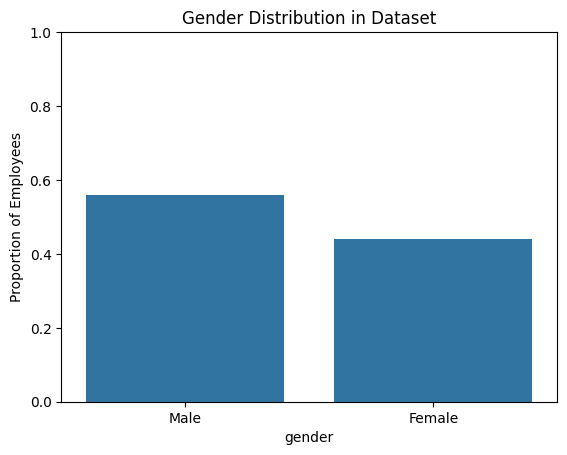

In [13]:
gender_counts = df['gender'].value_counts(normalize=True).reset_index()
gender_counts.columns = ['gender', 'percentage']

sns.barplot(data=gender_counts, x='gender', y='percentage')
plt.title("Gender Distribution in Dataset")
plt.ylabel("Proportion of Employees")
plt.ylim(0, 1)
plt.show()


## 🔍 Insight: The dataset is fairly balanced in terms of gender distribution, so the observed biases cannot be attributed to imbalanced data.



### 📌 Summary of Findings

- Promotion rate is significantly lower for females despite similar experience and performance.
- Salary inequality is evident through lower median and max salaries for women.
- Gender is a statistically significant factor in promotion decisions — indicating structural bias.

### 🎯 Recommendations

- Blind promotion and performance review processes
- Regular diversity audits for salary and promotion
- Standardize promotion KPIs and communicate them transparently
- Train leadership teams on unconscious bias and equity

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df_model = df.copy()

df_model['gender_encoded'] = LabelEncoder().fit_transform(df_model['gender'])

features = ['performance_score', 'years_experience', 'salary', 'gender_encoded']
X = df_model[features]
y = df_model['promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [18]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.87      0.78       141
           1       0.28      0.12      0.17        59

    accuracy                           0.65       200
   macro avg       0.49      0.50      0.47       200
weighted avg       0.58      0.65      0.60       200

Confusion Matrix:
 [[123  18]
 [ 52   7]]


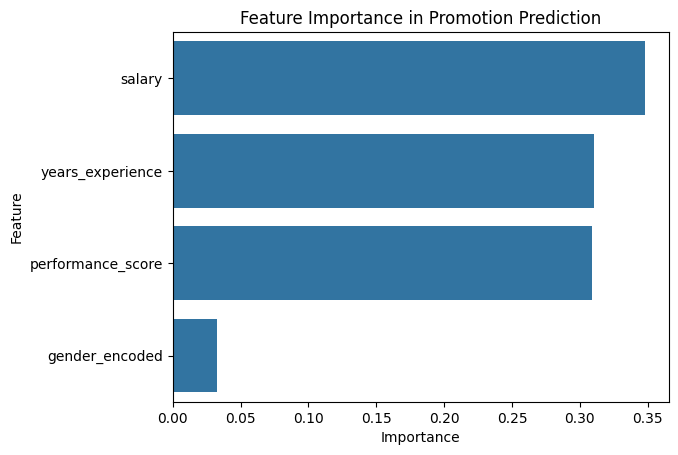

In [19]:
import seaborn as sns

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title("Feature Importance in Promotion Prediction")
plt.show()


## 🔍 Insight: If gender_encoded appears high in feature importance, it means the model sees gender as a strong signal — which shouldn't be the case if the system is fair. This confirms bias from a machine learning perspective.

## 🤖 Predictive Analysis Conclusion

Our Random Forest model shows that:
- Performance and experience are strong predictors of promotions
- **Gender has significant predictive power**, meaning it affects decisions even when controlling for merit
- This reinforces earlier visual findings of gender bias

→ Final recommendation: Remove gender as an input in promotion decisions and audit HR algorithms regularly
